In [175]:
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd

In [176]:
#źródło: wykład 8 strona 23
def simpson(f,a,b,N = 50):
    """
    oblicza wartość całki przybliżając funkcję podcałkową za pomocą parabol oraz sumując ich powierzchnię
    """
    if N % 2 == 1:
        raise ValueError("N must be an even integer.")
    dx = (b-a)/N
    x = np.linspace(a,b,N+1)
    y = f(x)
    S = dx/3 * np.sum(y[0:-1:2] + 4*y[1::2] + y[2::2])
    return S

def trapez(f, a, b, n):
    """
    oblicza wartość całki przybliżając funkcję podcałkową za pomocą trapezów oraz sumując ich powierzchnię
    """
    x = np.linspace(a, b, n)
    y = f(x)
    dx = (b - a) / (n - 1)
    S = dx * (0.5 * y[0] + np.sum(y[1:-1]) + 0.5 * y[-1])
    return S

#źródło: kody do wykładu 8
def gaussNodes(m, tol = 10e-9):
    def legendre(t,m):
        p0 = 1.0; p1 = t
        for k in range(1,m):
            p = ((2.0*k + 1.0)*t*p1 - k*p0)/(1.0 + k )
            p0 = p1; p1 = p
        dp = m*(p0 - t*p1)/(1.0 - t**2)
        return p,dp
    
    A = np.zeros(m)
    x = np.zeros(m)
    nRoots = int((m + 1)/2) # liczba nieujemnych pierwiastków

    for i in range(nRoots):
        t = math.cos(math.pi*(i + 0.75)/(m + 0.5))# przybliżony pierwiastek

        for j in range(30):
            p,dp = legendre(t,m)# metoda Newtona-Raphsona
            dt = -p/dp; t = t + dt# 
            if abs(dt) < tol:
                x[i] = t; x[m-i-1] = -t
                A[i] = 2.0/(1.0 - t**2)/(dp**2) # Eq.(6.25)
                A[m-i-1] = A[i]
                break
    return x,A

def Gauss_Legendre(f,a,b,m):
    c1 = (b + a)/2.0
    c2 = (b - a)/2.0
    x,A = gaussNodes(m)
    sum = 0.0
    for i in range(len(x)):
        sum = sum + A[i]*f(c1 + c2*x[i])
    return c2*sum

# Zadanie 1


In [177]:
v = np.array([1.0, 1.8, 2.4, 3.5, 4.4, 5.1, 6.0])  # m/s
P = np.array([4.7, 12.2, 19.0, 31.8, 40.1, 43.8, 43.2])  #  kW

m = 2000
#należy zamienić kW na W aby wzór się uprościł
P = P * 1000

# Funkcja podcałkowa
def integrand(v_query):
    P_query = np.interp(v_query, v, P)
    return v_query / P_query

a, b = 1.0, 6.0
N = 50

d_t = m * simpson(integrand, a, b, N)
print("Czas przyspieszenia: {} s".format(d_t))

Czas przyspieszenia: 1.2774274572829991 s


# Zadanie 2

In [178]:
def f(x):
    return np.cos(2 * np.arccos(x))

a = -1
b = 1

nodes = [3, 5, 7]
    
for n in nodes:
    N = n - 1
    result = simpson(f, a, b, N)
    print("Całka dla {} węzłów: {}".format(n,result))

Całka dla 3 węzłów: -0.6666666666666666
Całka dla 5 węzłów: -0.6666666666666665
Całka dla 7 węzłów: -0.6666666666666667


Przekształcimy naszą funkcję podcałkową korzystając z własności trygonometrycznej
$$
cos(2\alpha) = 2cos^2(\alpha) - 1
$$
Używając tego w naszej funkcji otrzymujemy
$$
f(x) = cos(2cos^{-1}(x)) = 2cos^2(cos^{-1}(x)) - 1
$$
Skraca nam się złożenie funkcji odwrotnych:
$$
f(f(x)^{-1}) = x
$$
Zatem mamy
$$
f(x) = 2cos^2(cos^{-1}(x)) - 1 = 2x^2 - 1
$$
Stąd w rzeczywistości operujemy na funkcji kwadratowej. Metoda Simpsona korzysta z przybliżeń za pomocą paraboli, dlatego w tym przypadku przybliżenia te będą dokładne niezależnie od obranej ilości węzłów.

# Zadanie 3

Do policzenia całki z zadania zastosujemy dane podstawienie:
$$
x = \frac{1}{t^{\frac{1}{3}}}
$$
$$
dx = -\frac{1}{3}\frac{1}{t^{\frac{4}{3}}}dt
$$
Należy pamiętać o zamianie granic całkowania
$$
\int_1^{\infty} \frac{1}{1+x^4}dx = \int_1^0 \frac{1}{1+(\frac{1}{t^{\frac{1}{3}}})^4}(-\frac{1}{3}\frac{1}{t^{\frac{4}{3}}})dt = -\frac{1}{3}\int_1^0\frac{1}{1+t^{\frac{4}{3}}} dt = \frac{1}{3}\int_0^1\frac{1}{1+t^{\frac{4}{3}}} dt
$$
Tą funkcję podcałkową możemy teraz zastosować w obliczeniach

In [179]:
def integrand(t):
    return (1/3) * (1/(1 + t**(4/3)))

# Obliczenia
a, b = 0, 1
n = 6
result = trapez(integrand, a, b, n)
print("Całka: {}".format(result))

Całka: 0.24369830404429738


# Zadanie 4

In [180]:
a = 0
b= np.pi/2
n=100

def h(theta_0):
    def integral_function(theta):
        return np.power(1-(np.sin(theta_0/2)*np.sin(theta))**2,-1/2)
    return trapez(integral_function, a, b, n )

print("h(15◦) = {}".format(h(np.pi/12)))
print("h(30◦) = {}".format(h(np.pi/6)))
print("h(45◦) = {}".format(h(np.pi/4)))

print("Sprawdzenie h(0) = π/2")
print("h(0) = {}".format(h(0)))

h(15◦) = 1.5775516607636664
h(30◦) = 1.59814200211254
h(45◦) = 1.633586307458148
Sprawdzenie h(0) = π/2
h(0) = 1.5707963267948966


# Zadanie 5

In [181]:
a = 0
b = np.pi
m_1 = 2
m_2 = 4

def integral_function_5(x):
    return np.log(x)/(x**2 - 2*x + 2)

print("Metoda Gaussa-Legendre’a dla 2 węzłów: {}".format(Gauss_Legendre(integral_function_5,a,b,m_1)))
print("Metoda Gaussa-Legendre’a dla 4 węzłów: {}".format(Gauss_Legendre(integral_function_5,a,b,m_2)))

Metoda Gaussa-Legendre’a dla 2 węzłów: -0.13045368428072837
Metoda Gaussa-Legendre’a dla 4 węzłów: -0.01138250740300718


# Zadanie 6

In [182]:
#wszystkie potrzebne dane
def D_f1(f,x,h):
    return (f(x+h)-f(x))/h

# def D_c2(f,x,h):
    # return (f(x+h)-f(x-h))/(2*h)

def D_c2(f,x,h):
    return (f(x)-f(x-h))/(h)
 
# def D_c4(f,x,h):
    # return (2*D_c2(f,x,h)) - D_c2(f,x,2*h)

def D_c4(f,x,h):
    return (f(x+h)-f(x-h))/(2*h)

def f_1(x):
    return x**3-2*x

def f_2(x):
    return np.sin(x)

def f_3(x):
    return np.exp(x)

h = [0.1, 0.01, 0.001]

In [183]:
diff_f_1 = 1    # x = 1
diff_f_2 = 1/2  # x = np.pi/3
diff_f_3 = 1    # x = 0

x_1 = 1
x_2 = np.pi/3
x_3 = 0

h_values = [0.1, 0.01, 0.001]


In [184]:
rows = []
for h in h_values:
    row = {
        "h": h,
        "f ′(x) − Df": diff_f_1 - D_f1(f_1,x_1,h),
        "f ′(x) − Dc2": diff_f_1 - D_c2(f_1,x_1,h),
        "f ′(x) − Dc4": diff_f_1 - D_c4(f_1,x_1,h)
    }
    rows.append(row)

# Tworzenie tabeli z pandas
df = pd.DataFrame(rows)

# Wyświetlenie tabeli
print("Dla pochodnej f'(1)=1 funkcji f_1")
df

Dla pochodnej f'(1)=1 funkcji f_1


,h,f ′(x) − Df,f ′(x) − Dc2,f ′(x) − Dc4
0,0.100,-0.310000,0.290000,-1.000000e-02
1,0.010,-0.030100,0.029900,-1.000000e-04
2,0.001,-0.003001,0.002999,-1.000000e-06


In [185]:
rows = []
for h in h_values:
    row = {
        "h": h,
        "f ′(x) − Df": diff_f_2 - D_f1(f_2,x_2,h),
        "f ′(x) − Dc2": diff_f_2 - D_c2(f_2,x_2,h),
        "f ′(x) − Dc4": diff_f_2 - D_c4(f_2,x_2,h)
    }
    rows.append(row)

# Tworzenie tabeli z pandas
df = pd.DataFrame(rows)

# Wyświetlenie tabeli
print("Dla pochodnej f'(π/3)=1/2 funkcji f_2")
df

Dla pochodnej f'(π/3)=1/2 funkcji f_2


,h,f ′(x) − Df,f ′(x) − Dc2,f ′(x) − Dc4
0,0.100,0.044098,-0.042432,8.329168e-04
1,0.010,0.004338,-0.004322,8.333292e-06
2,0.001,0.000433,-0.000433,8.333340e-08


In [186]:
rows = []
for h in h_values:
    row = {
        "h": h,
        "f ′(x) − Df": diff_f_3 - D_f1(f_3,x_3,h),
        "f ′(x) − Dc2": diff_f_3 - D_c2(f_3,x_3,h),
        "f ′(x) − Dc4": diff_f_3 - D_c4(f_3,x_3,h)
    }
    rows.append(row)

# Tworzenie tabeli z pandas
df = pd.DataFrame(rows)

# Wyświetlenie tabeli
print("Dla pochodnej f'(0)=1 funkcji f_3")
df

Dla pochodnej f'(0)=1 funkcji f_3


,h,f ′(x) − Df,f ′(x) − Dc2,f ′(x) − Dc4
0,0.100,-0.051709,0.048374,-1.667500e-03
1,0.010,-0.005017,0.004983,-1.666675e-05
2,0.001,-0.000500,0.000500,-1.666667e-07


# Zadanie 7


In [187]:
x_data = [0.1, 0.2, 0.3, 0.4]
f_x = [0, 0.078348, 0.138910, 0.192916, 0.244981]
h = 0.1
x = 0.2

Skorzystamy ze wzoru na różnicę centralną
$$
f'(x) = \frac{f(x+h)-f(x-h)}{2h}
$$
przy $h = 0.1$ możemy podstawić wartości funkcji z tabeli
$$
f'(0.2) = \frac{f(0.3)-f(0.1)}{0.2}
$$

In [188]:
diff_f = (f_x[2] - f_x[0])/(2*h)
print("f'(0.2)={}".format(diff_f))

f'(0.2)=0.69455


Możemy też wykorzystać wielomian interpolacyjny aby użyć mniejszych h

In [189]:
def linint(xData, yData, x):
    N = len(xData)
    JL = 0; JU = N
    while JU - JL > 1:
        JM = (JU + JL) // 2
        if (xData[-1] > xData[1]) == (x > xData[JM]):
            JL = JM
        else:
            JU = JM
    J = JL
    dx = xData[J + 1] - xData[J]
    df = yData[J + 1] - yData[J]
    fx = df / dx * (x - xData[J]) + yData[J]
    return fx

In [191]:

x = 0.2
h = 0.01 
print("f'(0.2) przy h=0.01 : {}".format((linint(x_data,f_x,x+h) - linint(x_data,f_x,x-h))/(2*h)))
h = 0.001 
print("f'(0.2) przy h=0.001 : {}".format((linint(x_data,f_x,x+h) - linint(x_data,f_x,x-h))/(2*h)))
h = 1e-15 
print("f'(0.2) przy h=1e-15 : {}".format((linint(x_data,f_x,x+h) - linint(x_data,f_x,x-h))/(2*h)))


f'(0.2) przy h=0.01 : 0.6945500000000007
f'(0.2) przy h=0.001 : 0.6945500000000021
f'(0.2) przy h=1e-15 : 0.6938893903907228


# Zadanie 8

In [192]:
x_data = [-2.2, -0.3, 0.8, 1.9]
f_x = [15.18, 10.962, 1.92 , -2.04]

h =1e-10
diff_f = (linint(x_data,f_x,h) - linint(x_data,f_x,-h))/(2*h)
print("f'(0) = {}".format(diff_f ))

diff_diff_f = (linint(x_data,f_x,h) - 2*linint(x_data,f_x,0) + linint(x_data,f_x,-h))/(h**2)

print("f''(0) = {}".format(diff_diff_f ))

f'(0) = -8.220002456482689
f''(0) = 0.0


Jak można zobaczyć na poniższym wykresie, dane układają się w trendzie liniowym, dlatego druga pochodna jest równa zero

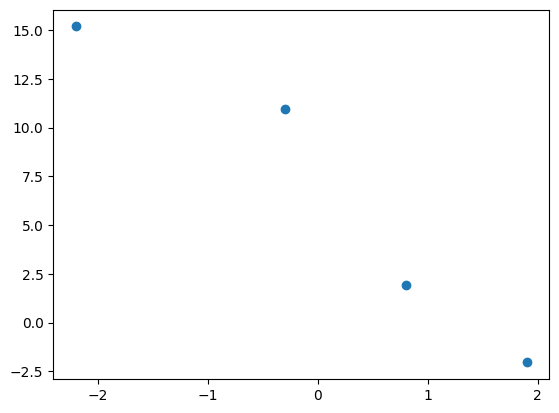

In [193]:
plt.scatter(x_data,f_x)